Este projeto utiliza dados simulados inspirados em atividades reais da pré-operação de uma distribuidora de energia. Criado para fins educacionais.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("base_servicos_pre_operacao.csv",sep=",")
df

,ID_Equipamento,Tipo_Equipamento,Regiao,Tipo_Servico,Critico,Status_Servico,Data_Programada,Data_Execucao,Tempo_Execucao_min
0,EQUIP-1001,Transformador,Fortaleza,Inspeção,Não,Concluído,2024-08-27,2024-08-28,71.0
1,EQUIP-1002,Seccionador,Juazeiro do Norte,Manutenção Preventiva,Não,Em Andamento,2024-08-17,2024-08-17,120.0
2,EQUIP-1003,Religador,Juazeiro do Norte,Troca de Equipamento,Não,Concluído,2024-08-13,2024-08-13,63.0
3,EQUIP-1004,Religador,Quixadá,Inspeção,Não,Concluído,2024-08-19,2024-08-19,99.0
4,EQUIP-1005,Transformador,Quixadá,Troca de Equipamento,Não,Em Andamento,2024-08-07,2024-08-09,39.0
...,...,...,...,...,...,...,...,...,...
195,EQUIP-1196,Religador,Sobral,Troca de Equipamento,Não,Concluído,2024-08-16,2024-08-16,77.0
196,EQUIP-1197,Seccionador,Sobral,Troca de Equipamento,Não,Concluído,2024-08-09,2024-08-11,93.0
197,EQUIP-1198,Disjuntor,Maracanaú,Manutenção Preventiva,Sim,Concluído,2024-08-08,2024-08-08,49.0
198,EQUIP-1199,Religador,Quixadá,Manutenção Preventiva,Não,Em Andamento,2024-08-06,NaN,NaN


In [11]:
#Verificando os tipos de dados
for col in df.columns:
    tipos = df[col].apply(type).unique()  # Lista os tipos de dados únicos na coluna
    print(f"Coluna: {col} - Tipos encontrados: {tipos}")

Coluna: ID_Equipamento - Tipos encontrados: [<class 'str'>]
Coluna: Tipo_Equipamento - Tipos encontrados: [<class 'str'>]
Coluna: Regiao - Tipos encontrados: [<class 'str'>]
Coluna: Tipo_Servico - Tipos encontrados: [<class 'str'>]
Coluna: Critico - Tipos encontrados: [<class 'str'>]
Coluna: Status_Servico - Tipos encontrados: [<class 'str'>]
Coluna: Data_Programada - Tipos encontrados: [<class 'str'>]
Coluna: Data_Execucao - Tipos encontrados: [<class 'str'> <class 'float'>]
Coluna: Tempo_Execucao_min - Tipos encontrados: [<class 'float'>]


In [12]:
# 1. Converter as colunas de data
df['Data_Programada'] = pd.to_datetime(df['Data_Programada'])
df['Data_Execucao'] = pd.to_datetime(df['Data_Execucao'], errors='coerce')
print("Tipos de dados após a conversão das colunas de data:")
df.info()

Tipos de dados após a conversão das colunas de data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Equipamento      200 non-null    object        
 1   Tipo_Equipamento    200 non-null    object        
 2   Regiao              200 non-null    object        
 3   Tipo_Servico        200 non-null    object        
 4   Critico             200 non-null    object        
 5   Status_Servico      200 non-null    object        
 6   Data_Programada     200 non-null    datetime64[ns]
 7   Data_Execucao       150 non-null    datetime64[ns]
 8   Tempo_Execucao_min  150 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 14.2+ KB


In [13]:
# 2. Investigar os valores ausentes
print("\nStatus dos serviços com Tempo_Execucao_min ausente:")
print(df[df['Tempo_Execucao_min'].isnull()]['Status_Servico'].value_counts())

# Salvar o dataframe limpo em um novo arquivo CSV
df.to_csv('base_servicos_cleaned.csv', index=False)

print("\nArquivo 'base_servicos_cleaned.csv' salvo com sucesso!")


Status dos serviços com Tempo_Execucao_min ausente:
Status_Servico
Concluído       29
Em Andamento    14
Pendente         7
Name: count, dtype: int64

Arquivo 'base_servicos_cleaned.csv' salvo com sucesso!


## Observações Iniciais ##

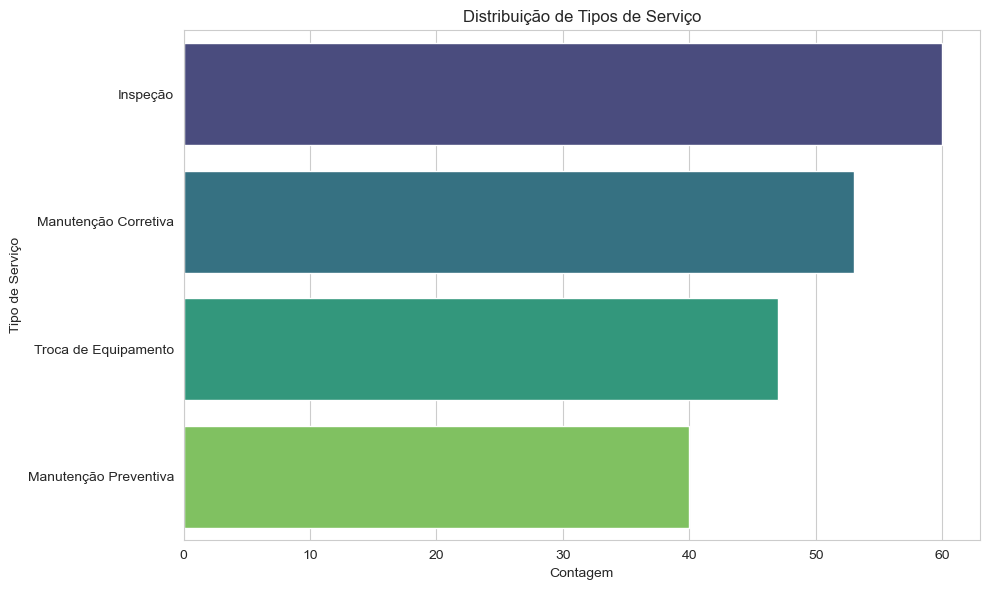

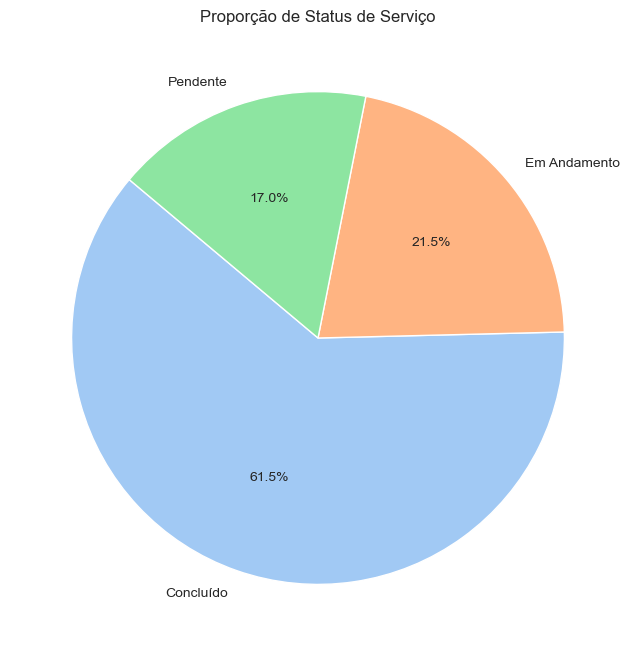

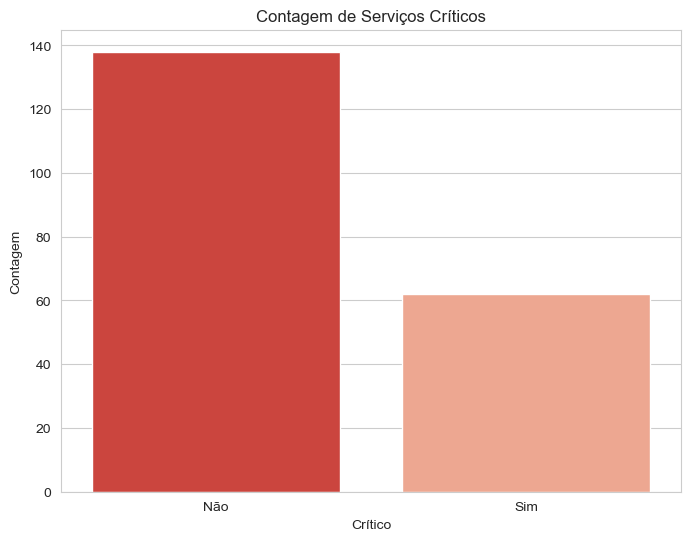

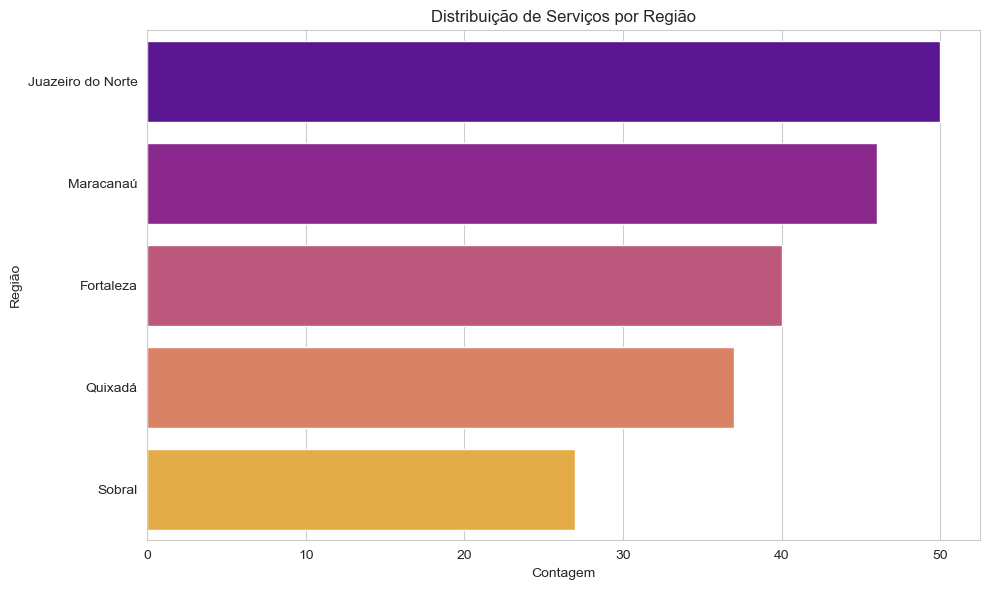

In [18]:

df = pd.read_csv('base_servicos_cleaned.csv')


sns.set_style("whitegrid")

# 1. Distribuição dos Tipos de Serviço
plt.figure(figsize=(10, 6))
sns.countplot(y='Tipo_Servico', data=df, order = df['Tipo_Servico'].value_counts().index, palette='viridis')
plt.title('Distribuição de Tipos de Serviço')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Serviço')
plt.tight_layout()
plt.savefig('distribuicao_tipos_servico.png')

# 2. Proporção de Serviços por Status
plt.figure(figsize=(8, 8))
status_counts = df['Status_Servico'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporção de Status de Serviço')
plt.ylabel('')
plt.savefig('proporcao_status_servico.png')

# 3. Contagem de Serviços Críticos
plt.figure(figsize=(8, 6))
sns.countplot(x='Critico', data=df, order = df['Critico'].value_counts().index, palette='Reds_r')
plt.title('Contagem de Serviços Críticos')
plt.xlabel('Crítico')
plt.ylabel('Contagem')
plt.savefig('contagem_servicos_criticos.png')

# 4. Distribuição de Serviços por Região
plt.figure(figsize=(10, 6))
sns.countplot(y='Regiao', data=df, order = df['Regiao'].value_counts().index, palette='plasma')
plt.title('Distribuição de Serviços por Região')
plt.xlabel('Contagem')
plt.ylabel('Região')
plt.tight_layout()
plt.savefig('distribuicao_servicos_regiao.png')

plt.show()

## Análise Bivariada ##

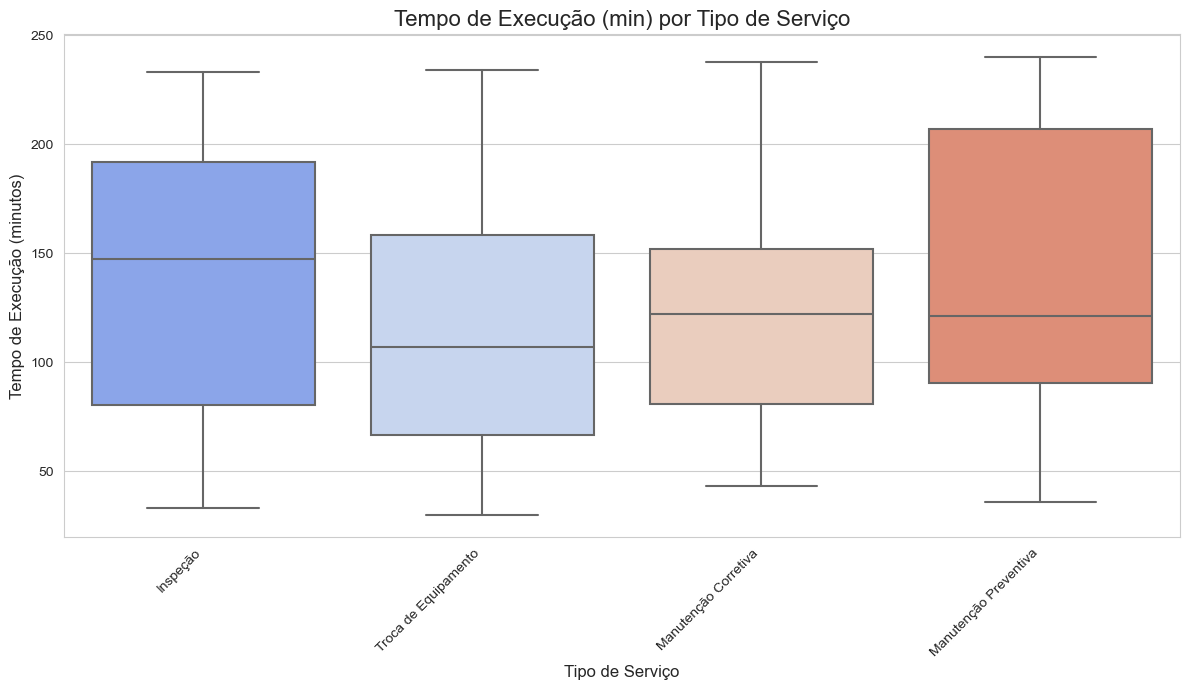

In [19]:
# Filtrando apenas serviços concluídos
df_completed = df[df['Status_Servico'] == 'Concluído'].dropna(subset=['Tempo_Execucao_min'])
# Criando Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Tipo_Servico', y='Tempo_Execucao_min', data=df_completed, palette='coolwarm')
plt.title('Tempo de Execução (min) por Tipo de Serviço', fontsize=16)
plt.xlabel('Tipo de Serviço', fontsize=12)
plt.ylabel('Tempo de Execução (minutos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('tempo_execucao_vs_tipo_servico.png')
plt.show()

Tabela de Contingência: Tipo de Equipamento vs. Tipo de Serviço
Tipo_Servico      Inspeção  Manutenção Corretiva  Manutenção Preventiva  \
Tipo_Equipamento                                                          
Disjuntor               13                    12                      9   
Religador               19                    14                     11   
Seccionador             15                    11                     12   
Transformador           13                    16                      8   

Tipo_Servico      Troca de Equipamento  
Tipo_Equipamento                        
Disjuntor                           11  
Religador                           14  
Seccionador                         12  
Transformador                       10  


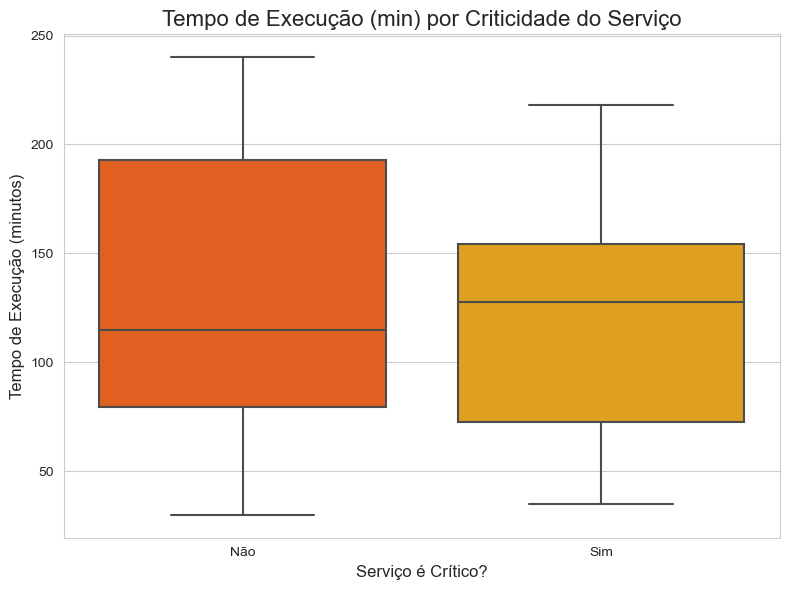

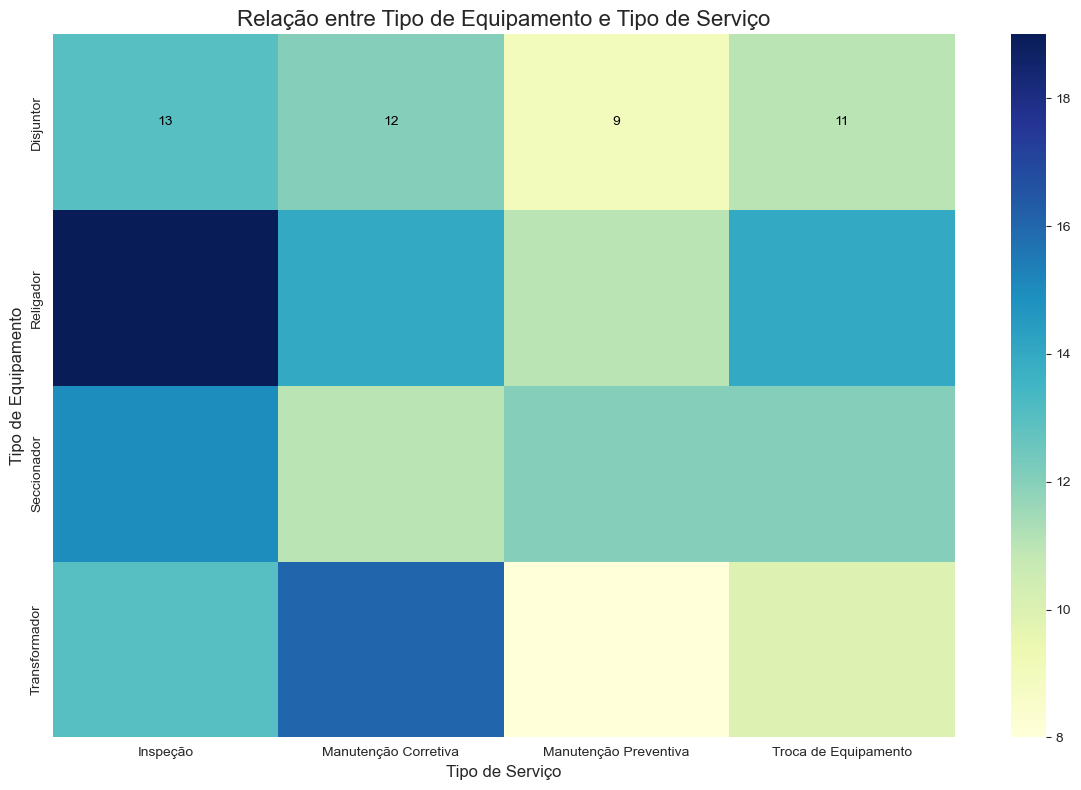

<Figure size 640x480 with 0 Axes>

In [24]:
# --- Análise 1: Tempo de Execução VS Criticidade ---

df_completed = df[df['Status_Servico'] == 'Concluído'].dropna(subset=['Tempo_Execucao_min'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Critico', y='Tempo_Execucao_min', data=df_completed, palette='autumn')
plt.title('Tempo de Execução (min) por Criticidade do Serviço', fontsize=16)
plt.xlabel('Serviço é Crítico?', fontsize=12)
plt.ylabel('Tempo de Execução (minutos)', fontsize=12)
plt.tight_layout()
plt.savefig('tempo_execucao_vs_criticidade.png')

# --- Análise 2: Tipo de Equipamento VS Tipo de Serviço ---

# Tabela de Contingência
contingency_table = pd.crosstab(df['Tipo_Equipamento'], df['Tipo_Servico'])

# Print the contingency table
print("Tabela de Contingência: Tipo de Equipamento vs. Tipo de Serviço")
print(contingency_table)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"color": "black"})
plt.title('Relação entre Tipo de Equipamento e Tipo de Serviço', fontsize=16)
plt.xlabel('Tipo de Serviço', fontsize=12)
plt.ylabel('Tipo de Equipamento', fontsize=12)
plt.tight_layout()

plt.show()

plt.savefig('heatmap_equipamento_vs_servico.png')

## Análise Temporal ##

C:\Users\monte\OneDrive\Documentos\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\monte\OneDrive\Documentos\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


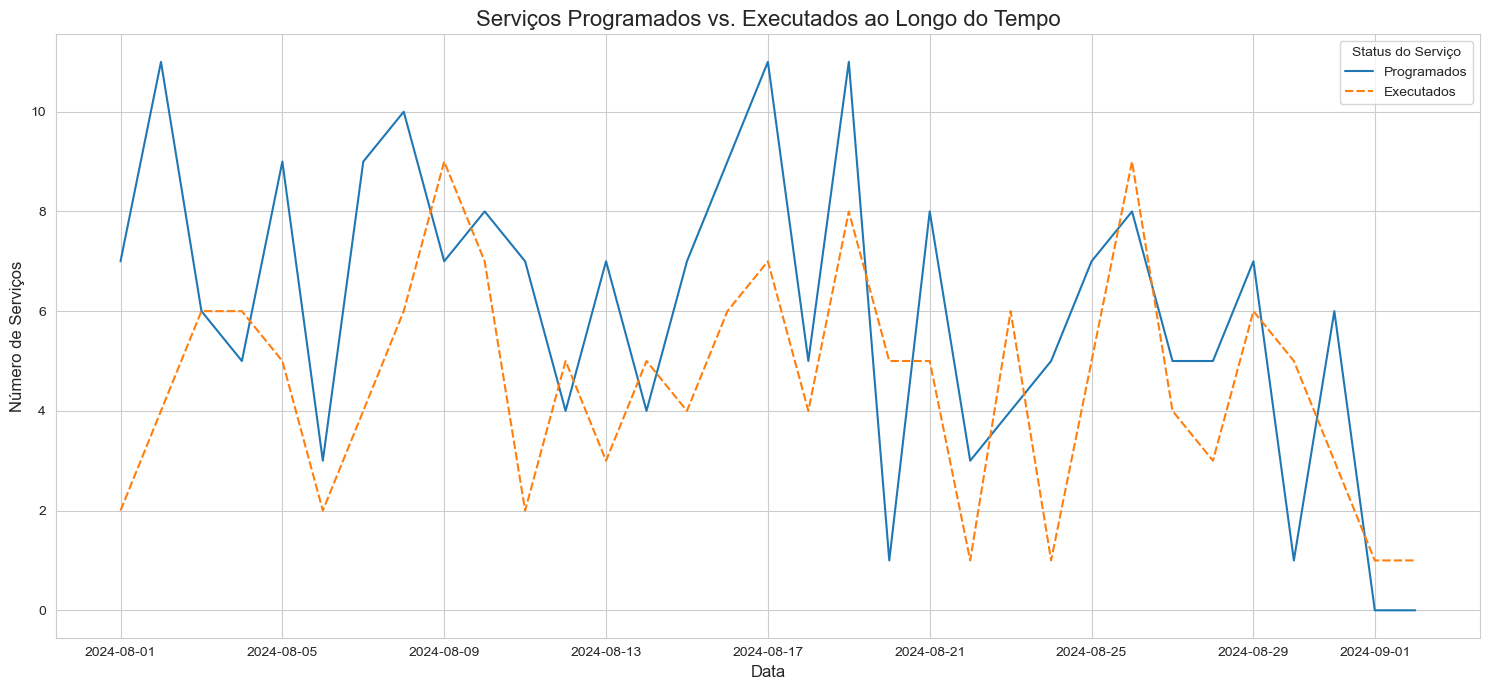

In [26]:

df = pd.read_csv('base_servicos_cleaned.csv', parse_dates=['Data_Programada', 'Data_Execucao'])

servicos_programados_por_dia = df.set_index('Data_Programada').resample('D').size().rename('Programados')
servicos_executados_por_dia = df.set_index('Data_Execucao').resample('D').size().rename('Executados')

time_series_df = pd.concat([servicos_programados_por_dia, servicos_executados_por_dia], axis=1).fillna(0)

plt.figure(figsize=(15, 7))
sns.lineplot(data=time_series_df)

plt.title('Serviços Programados vs. Executados ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Serviços', fontsize=12)
plt.legend(title='Status do Serviço')
plt.grid(True)
plt.tight_layout()
plt.savefig('analise_temporal_servicos.png')

plt.show()